In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or any {'0', '1', '2'}
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import clear_output

In [2]:
print(tf.__version__)

2.12.0


In [3]:
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def __init__(self, metrics=[]):
        self.print_metrics = metrics
        print(self.print_metrics)

    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]

        # Plotting
        metrics = [x for x in logs if 'val' not in x and x in self.print_metrics]

        f, axs = plt.subplots(len(metrics)//2 , 2, figsize=(20,10))
        
        clear_output(wait=True)
        axs = list(np.array(axs).flatten())

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric],
                        label=metric)
            
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([min(min(history.history['loss']), min(history.history['val_loss']))*0.8, max(max(history.history['loss']), max(history.history['val_loss']))*1.1])
    plt.xlabel('Epoch')
    plt.ylabel('Error [monthly spend]')
    plt.legend()
    plt.grid(True)

In [13]:
dataset = pd.read_json('train_data.json')
dataset = dataset.drop(columns = ['monthly_spend', 'profit', 'compliant'])

target = 'time_as_client'
# now we have an estimator for the clients monthly spend and we can use it as a feature
m_spend_model = tf.keras.models.load_model('m_spend_regressor.dnn')
m_spend_data = dataset.copy().drop(target,axis=1)

dataset['est_monthly_spend'] = m_spend_model.predict(m_spend_data).flatten()

,residence_1_2_years,residence_3_years,residence_6_months_or_less,residence_7_12_months,bank_1_2_years,bank_3_years,bank_6_months_or_less,bank_7_12_months,monthly_income,monthly_rent,...,approved_income_ratio,score_tu,score_fico_money,score_lexisnexis,score_serasa,score_unit4,credit_line_requested,credit_line_approved,app_req_ratio,time_as_client
0,0,0,1,0,0,1,0,0,1323.062313,950,...,0.831405,411,699,440,102,418,1500,1100,0.733333,102
1,0,1,0,0,0,1,0,0,6400.531602,2400,...,3.890302,753,850,575,89,385,25500,24900,0.976471,102
2,1,0,0,0,0,1,0,0,1400.499240,100,...,5.783652,478,646,464,670,213,9000,8100,0.900000,102
3,0,1,0,0,0,0,1,0,1275.467006,0,...,3.606522,780,850,690,305,398,5500,4600,0.836364,102
5,1,0,0,0,0,0,1,0,1725.387863,900,...,17.271479,200,319,200,244,415,30500,29800,0.977049,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9216,0,1,0,0,0,0,0,1,4512.606902,2450,...,0.598324,719,695,652,0,675,4500,2700,0.600000,102
9217,0,1,0,0,1,0,0,0,2302.179408,1400,...,0.521245,200,100,265,0,205,1500,1200,0.800000,102
9218,0,1,0,0,0,1,0,0,843.608551,250,...,1.303922,727,519,592,38,580,1500,1100,0.733333,102
9219,0,1,0,0,0,0,1,0,3165.962014,2300,...,0.379032,784,717,656,197,352,2000,1200,0.600000,102


In [16]:
# now we have an estimator for the clients monthly spend and we can use it as a feature
m_spend_model = tf.keras.models.load_model('m_spend_regressor.dnn')
m_spend_data = dataset.copy().drop(target,axis=1)

dataset['est_monthly_spend'] = m_spend_model.predict(m_spend_data).flatten()

257/257 [==============================] - 0s 786us/step


,residence_1_2_years,residence_3_years,residence_6_months_or_less,residence_7_12_months,bank_1_2_years,bank_3_years,bank_6_months_or_less,bank_7_12_months,monthly_income,monthly_rent,...,score_tu,score_fico_money,score_lexisnexis,score_serasa,score_unit4,credit_line_requested,credit_line_approved,app_req_ratio,time_as_client,est_monthly_spend
0,0,0,1,0,0,1,0,0,1323.062313,950,...,411,699,440,102,418,1500,1100,0.733333,102,128.002625
1,0,1,0,0,0,1,0,0,6400.531602,2400,...,753,850,575,89,385,25500,24900,0.976471,102,2581.128906
2,1,0,0,0,0,1,0,0,1400.499240,100,...,478,646,464,670,213,9000,8100,0.900000,102,986.363525
3,0,1,0,0,0,0,1,0,1275.467006,0,...,780,850,690,305,398,5500,4600,0.836364,102,979.466492
5,1,0,0,0,0,0,1,0,1725.387863,900,...,200,319,200,244,415,30500,29800,0.977049,1,569.890442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9216,0,1,0,0,0,0,0,1,4512.606902,2450,...,719,695,652,0,675,4500,2700,0.600000,102,1069.980347
9217,0,1,0,0,1,0,0,0,2302.179408,1400,...,200,100,265,0,205,1500,1200,0.800000,102,405.713196
9218,0,1,0,0,0,1,0,0,843.608551,250,...,727,519,592,38,580,1500,1100,0.733333,102,430.096130
9219,0,1,0,0,0,0,1,0,3165.962014,2300,...,784,717,656,197,352,2000,1200,0.600000,102,222.283173


In [17]:
train_dataset = dataset.sample(frac=0.9, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [18]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

features = test_features.columns.drop(target)

In [19]:
train_labels = train_features.pop(target)
test_labels = test_features.pop(target)

In [20]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())


[[1.84698820e-01 5.90250373e-01 1.09952636e-01 1.15098163e-01
  2.00135514e-01 5.17942250e-01 1.97156459e-01 8.32769349e-02
  2.85775513e+03 1.23859863e+03 6.40352547e-01 1.61915503e+03
  6.85863733e+00 5.11778198e+02 5.15836609e+02 4.66530640e+02
  2.47935928e+02 3.94378021e+02 8.75497461e+03 7.92918164e+03
  7.87450731e-01 1.01086743e+03]]


In [21]:
first = np.array(train_features[:1])

with np.printoptions(precision=4, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   0.        0.        1.        0.        0.        1.        0.
     0.     1393.6929  350.        0.     1043.6929    0.7893  200.
   134.      262.      560.      433.     2000.     1100.        0.55
   738.14  ]]

Normalized: [[-0.476  -1.2002  2.8451 -0.3607 -0.5002  0.9647 -0.4956 -0.3014 -0.6698
  -0.8254 -1.3344 -0.3606 -0.1359 -1.421  -1.5587 -1.2925  1.2773  0.2474
  -0.8492 -0.8591 -1.2936 -0.2438]]


In [62]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        # layers.Dropout(0.5),
        layers.Dense(8, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1)
    ])


    lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
                    0.5,
                    decay_steps = 1000,
                    decay_rate=10,
                    staircase=False)
    
    model.compile(loss='mean_absolute_error', metrics=[tf.keras.metrics.RootMeanSquaredError()],
                  optimizer=tf.keras.optimizers.Adam(lr_schedule))

    model.save_weights('initial_mspend_model.h5')
    
    return model



In [63]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 22)               45        
 n)                                                              
                                                                 
 dense_17 (Dense)            (None, 32)                736       
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dense_20 (Dense)            (None, 4)                 36        
                                                                 
 dense_21 (Dense)            (None, 1)                 5         
                                                      

In [52]:
metrics_to_plot = ['loss', 'root_mean_squared_error']
callbacks_list = [PlotLearning(metrics_to_plot),
                  tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, min_delta=1)]

dnn_model.load_weights('initial_mspend_model.h5')

['loss', 'root_mean_squared_error']


26/26 [==============================] - 0s 800us/step


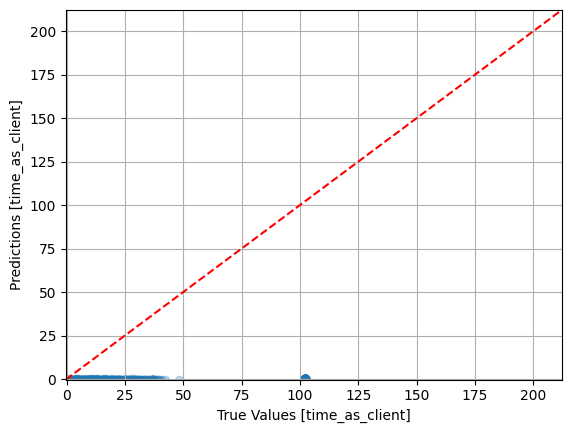

In [53]:
dnn_model.evaluate(test_features, test_labels, verbose=1)

test_predictions = dnn_model.predict(test_features).flatten()

plt.scatter(test_labels, test_predictions, alpha=0.25)
plt.xlabel('True Values [time_as_client]')
plt.ylabel('Predictions [time_as_client]')
lims = [min(min(test_labels), min(test_predictions))*0.5, max(max(test_labels), max(test_predictions))*1.1 + 100]
plt.xlim(lims)
plt.ylim(lims)
plt.grid()
plt.plot(lims, lims, 'r--')

count    821.000000
mean     -74.146911
std       41.042879
min     -102.627256
25%     -102.422626
50%     -102.363228
75%      -23.469874
max       -1.268524
Name: time_as_client, dtype: float64


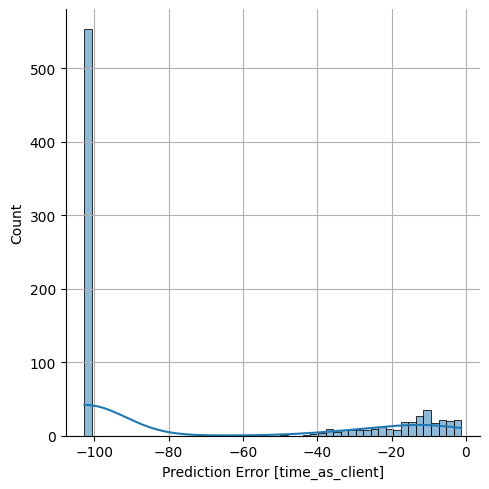

In [54]:
error = test_predictions - test_labels
print(error.describe())
sns.displot(error, bins=50, kde=True)
plt.grid()
plt.xlabel('Prediction Error [time_as_client]')
_ = plt.ylabel('Count')

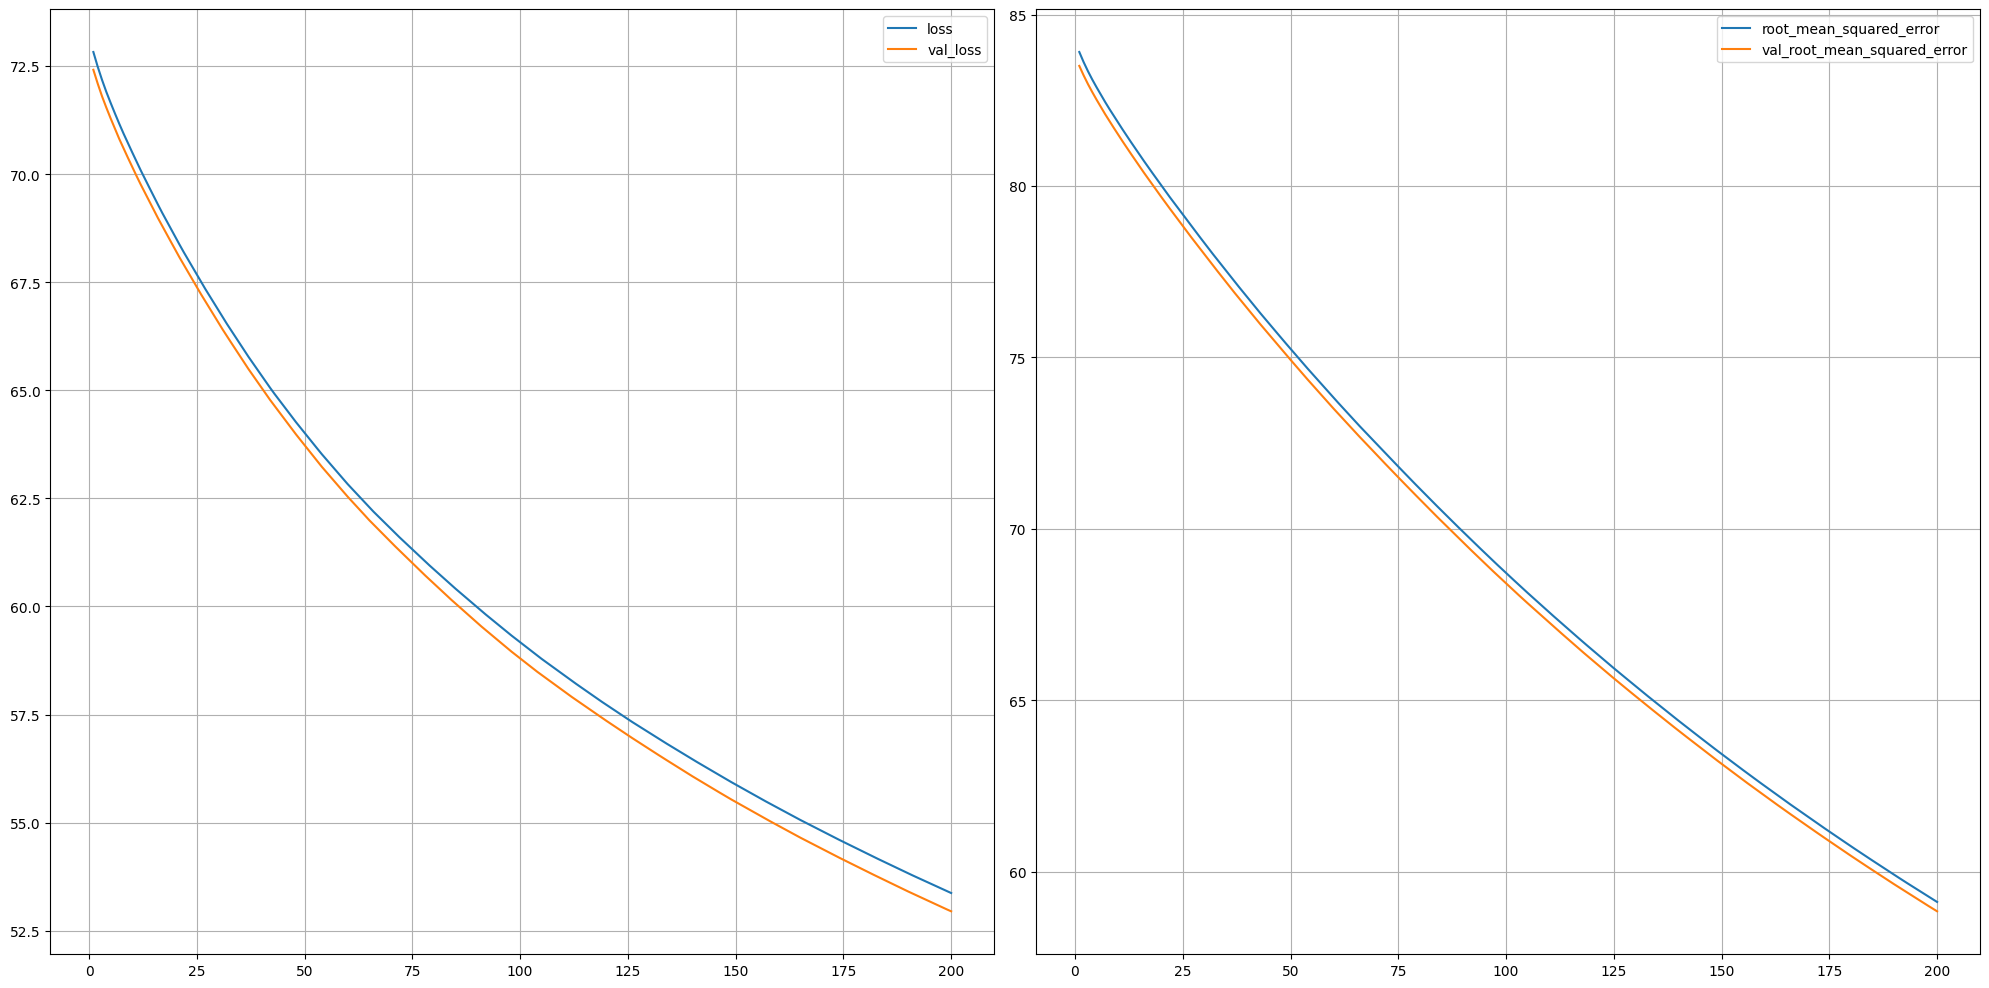

185/185 [==============================] - 1s 3ms/step - loss: 53.3728 - root_mean_squared_error: 59.1177 - val_loss: 52.9501 - val_root_mean_squared_error: 58.8452


In [61]:
metrics_to_plot = ['loss', 'root_mean_squared_error']
callbacks_list = [PlotLearning(metrics_to_plot),
                  tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=35, min_delta=1)]

dnn_model.load_weights('initial_mspend_model.h5')

history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, 
    epochs=200,
    callbacks=callbacks_list)

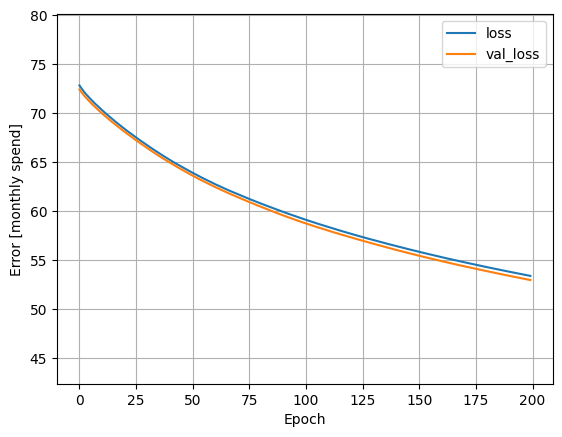

In [64]:
plot_loss(history)

26/26 [==============================] - 0s 752us/step


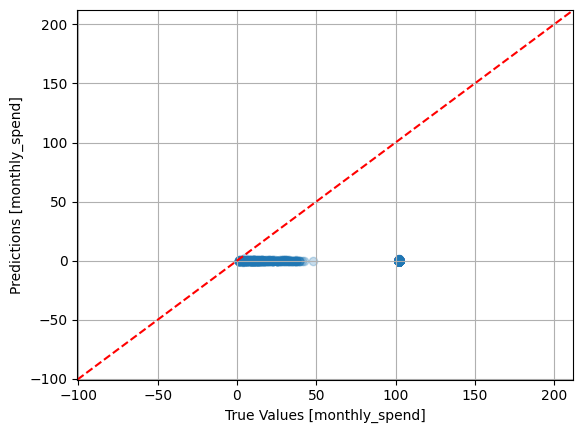

In [65]:
dnn_model.evaluate(test_features, test_labels, verbose=1)

test_predictions = dnn_model.predict(test_features).flatten()

plt.scatter(test_labels, test_predictions, alpha=0.25)
plt.xlabel('True Values [monthly_spend]')
plt.ylabel('Predictions [monthly_spend]')
lims = [min(min(test_labels), min(test_predictions))*0.9 - 100, max(max(test_labels), max(test_predictions))*1.1 + 100]
plt.xlim(lims)
plt.ylim(lims)
plt.grid()
plt.plot(lims, lims, 'r--')

count    821.000000
mean      28.236090
std       41.048533
min       -0.007515
25%       -0.007515
50%       -0.007515
75%       78.992485
max      100.992485
Name: time_as_client, dtype: float64


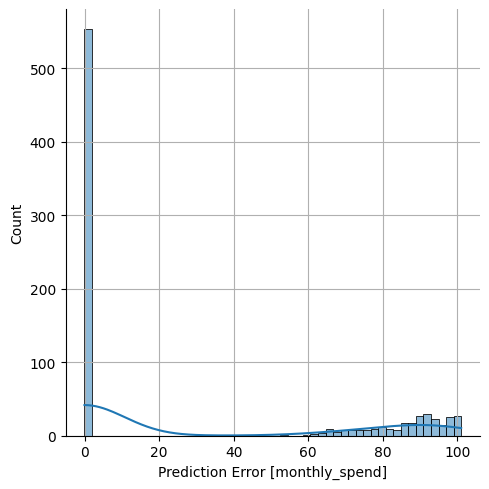

In [49]:
error = test_predictions - test_labels
print(error.describe())
sns.displot(error, bins=50, kde=True)
plt.grid()
plt.xlabel('Prediction Error [monthly_spend]')
_ = plt.ylabel('Count')

In [ ]:
original_test_dataset = pd.read_json('test_data.json')
test_dataset_features = original_test_dataset[features]
test_dataset_target = original_test_dataset[[target]].copy()
predictions = dnn_model.predict(test_dataset_features).flatten()
original_test_dataset['predicted_monthly_spend'] = predictions
test_dataset_target['error'] = test_dataset_target[target] - original_test_dataset['predicted_monthly_spend']
sns.displot(test_dataset_target['error'], bins=50, kde=True)

In [ ]:
dnn_model.save('m_spend_regressor.dnn')